<a href="https://colab.research.google.com/github/zsf4ee/cacheprograms/blob/main/gaming_and_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to download the dataset from kaggle to the notebook
# Need to download kaggle.json on kaggle settings, then upload in files your kaggle.json file


In [ ]:
import os
import shutil

kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
shutil.move('kaggle.json', os.path.join(kaggle_dir, 'kaggle.json'))
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)


In [ ]:
import os
import zipfile

data_link = "learnplatform-covid19-impact-on-digital-learning"
data_folder = "learning_data"

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

!kaggle competitions download -c {data_link} -p {data_folder}

for file in os.listdir(data_folder):
    if file.endswith('.zip'):
        zip_path = os.path.join(data_folder, file)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_folder)
        os.remove(zip_path)
print("Dataset downloaded and extracted to", data_folder)

data_files = os.listdir(data_folder)
print("Extracted files:", data_files)


 86% 107M/124M [00:00<00:00, 225MB/s] 
100% 124M/124M [00:00<00:00, 207MB/s]
Dataset downloaded and extracted to learning_data
Extracted files: ['engagement_data', 'README.md', 'districts_info.csv', 'products_info.csv']


In [ ]:
import pandas as pd

districts_path = os.path.join(data_folder, 'districts_info.csv')
districts_info_df = pd.read_csv(districts_path)
districts_info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [ ]:
products_path = os.path.join(data_folder, 'products_info.csv')
products_info_df = pd.read_csv(products_path)
products_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [ ]:
engagements_path = os.path.join(data_folder, 'engagement_data')
for filename in os.listdir(engagements_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(engagements_path, filename)

        new_data = pd.read_csv(file_path)

        if 'lp_id' in new_data.columns:
          products_merged_df = pd.merge(products_info_df, new_data, left_on='LP ID', right_on='lp_id', how='left')

products_merged_df.drop('lp_id', axis=1, inplace=True)
products_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49143 entries, 0 to 49142
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LP ID                       49143 non-null  int64  
 1   URL                         49143 non-null  object 
 2   Product Name                49143 non-null  object 
 3   Provider/Company Name       49142 non-null  object 
 4   Sector(s)                   47241 non-null  object 
 5   Primary Essential Function  47241 non-null  object 
 6   time                        49133 non-null  object 
 7   pct_access                  49133 non-null  float64
 8   engagement_index            32313 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [ ]:
products_merged_df['engagement_index'].value_counts()

,count
engagement_index,
0.30,1493
0.64,1197
0.61,994
0.32,851
0.91,659
...,...
1610.82,1
54.22,1
35.63,1


<Axes: xlabel='time', ylabel='engagement_index'>

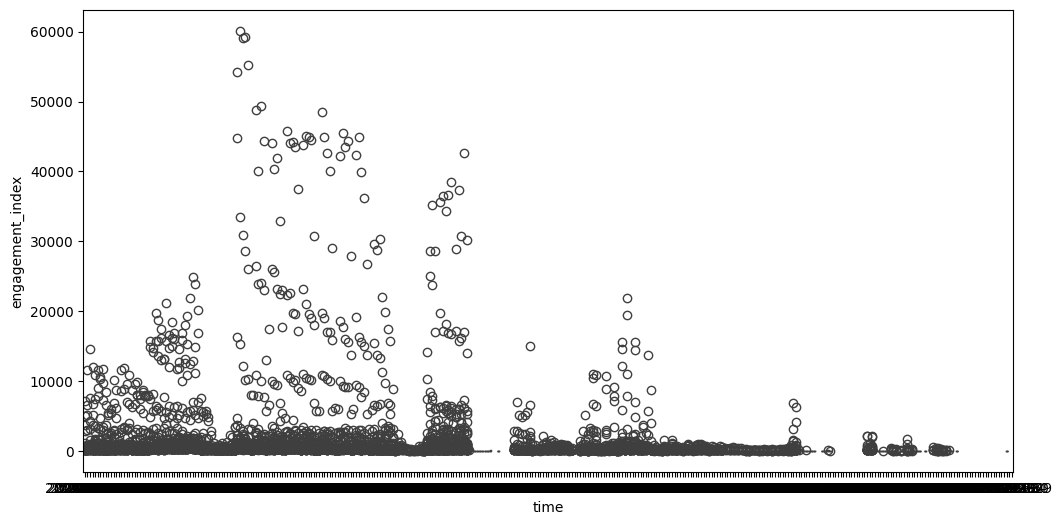

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=products_merged_df, x='time', y='engagement_index')

In [ ]:
import os
import pandas as pd

# define paths
data_folder = "learning_data"
districts_path = os.path.join(data_folder, 'districts_info.csv')
products_path = os.path.join(data_folder, 'products_info.csv')
engagements_path = os.path.join(data_folder, 'engagement_data')

# load data
districts_df = pd.read_csv(districts_path)
products_df = pd.read_csv(products_path)

# ensure consistent data types for merging
districts_df['district_id'] = districts_df['district_id'].astype(str)

# process engagement data
engagement_list = []
for file in os.listdir(engagements_path):
    if file.endswith('.csv'):
        district_id = file.split('.')[0]  # extract district_id from filename
        engagement_df = pd.read_csv(os.path.join(engagements_path, file))
        engagement_df['district_id'] = district_id  # add district_id
        engagement_list.append(engagement_df)

# combine all engagement files
engagement_df = pd.concat(engagement_list, ignore_index=True)
engagement_df['district_id'] = engagement_df['district_id'].astype(str)

# merge products with engagement data
products_engagement_df = pd.merge(
    products_df,
    engagement_df,
    left_on='LP ID',
    right_on='lp_id',
    how='inner'
)

# merge districts with the combined data
final_df = pd.merge(
    districts_df,
    products_engagement_df,
    on='district_id',
    how='inner'
)

# display the final DataFrame information
print(final_df.info())
print(final_df.head())

# save to a CSV file
final_df.to_csv(os.path.join(data_folder, 'merged_data.csv'), index=False)
print("Merged data saved to 'merged_data.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11691587 entries, 0 to 11691586
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   district_id                 object 
 1   state                       object 
 2   locale                      object 
 3   pct_black/hispanic          object 
 4   pct_free/reduced            object 
 5   county_connections_ratio    object 
 6   pp_total_raw                object 
 7   LP ID                       int64  
 8   URL                         object 
 9   Product Name                object 
 10  Provider/Company Name       object 
 11  Sector(s)                   object 
 12  Primary Essential Function  object 
 13  time                        object 
 14  lp_id                       float64
 15  pct_access                  float64
 16  engagement_index            float64
dtypes: float64(3), int64(1), object(13)
memory usage: 1.5+ GB
None
  district_id     state  locale pct_bl

In [ ]:
#new code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

merged_data_path = "learning_data/merged_data.csv"
df = pd.read_csv(merged_data_path)

df['engagement_index'].fillna(df['engagement_index'].median(), inplace=True)
df.dropna(subset=['pct_access'], inplace=True)

categorical_cols = ['state', 'locale', 'Product Name', 'Primary Essential Function']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Creating a classification target
threshold = df['engagement_index'].median()
df['engagement_class'] = (df['engagement_index'] > threshold).astype(int)

# Selecting features and target
features = ['pct_access', 'state', 'locale', 'Primary Essential Function']
X = df[features]
y = df['engagement_class']


<ipython-input-12-09b2732b4e79>:8: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(merged_data_path)
<ipython-input-12-09b2732b4e79>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engagement_index'].fillna(df['engagement_index'].median(), inplace=True)


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 0.8858763659442034
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91   2092067
           1       0.89      0.82      0.85   1412194

    accuracy                           0.89   3504261
   macro avg       0.89      0.88      0.88   3504261
weighted avg       0.89      0.89      0.89   3504261



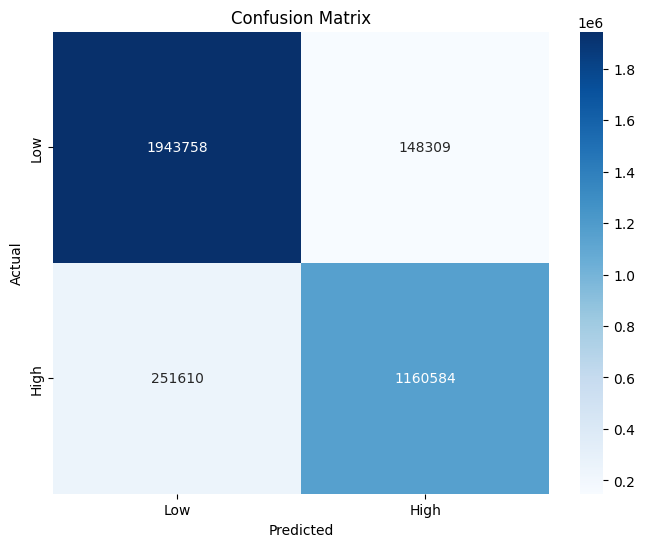

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the classifier with optimized parameters
rf_classifier = RandomForestClassifier(
    n_estimators=50,  # More trees for better generalization
    max_depth=10,  # Limit depth to avoid overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


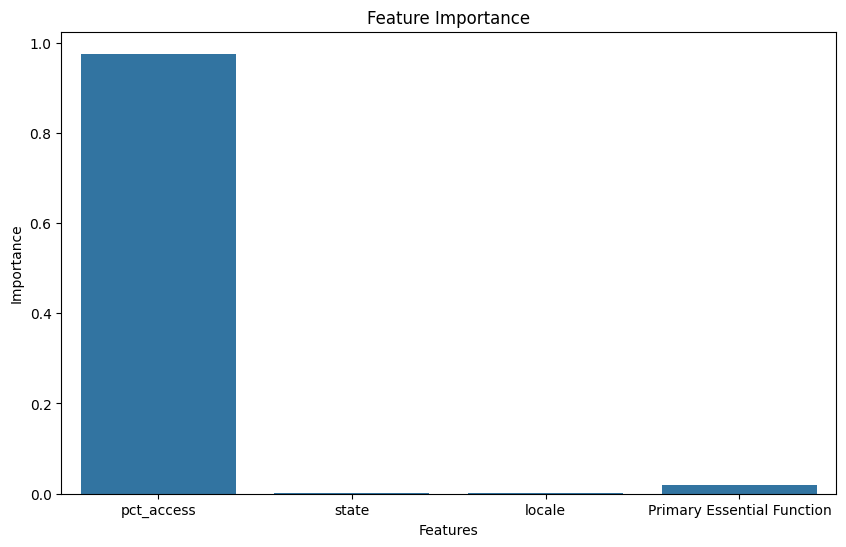

In [ ]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=26.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=25.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=25.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=37.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=37.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=37.1min


In [ ]:
import joblib

# Save the model
model_path = "learning_data/random_forest_model.pkl"
joblib.dump(rf_classifier, model_path)
print(f"Model saved to {model_path}")

# Save predictions
predictions_path = "learning_data/predictions.csv"
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv(predictions_path, index=False)
print(f"Predictions saved to {predictions_path}")


NEW CODE!!! Using demographic and socioeconomic data, predict which gamified tool would work best for each district.


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load merged data
merged_data_path = "learning_data/merged_data.csv"
df = pd.read_csv(merged_data_path)

print("Data Loaded Successfully")


<ipython-input-11-cc70309aed88>:7: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(merged_data_path)
<ipython-input-11-cc70309aed88>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engagement_index'].fillna(df['engagement_index'].median(), inplace=True)


In [ ]:
# Handle missing values for engagement_index and drop rows with missing pct_access
df['engagement_index'].fillna(df['engagement_index'].median(), inplace=True)
df.dropna(subset=['pct_access'], inplace=True)

# Replace missing values in other columns with placeholders or median as appropriate
for col in ['pct_black/hispanic', 'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw']:
    df[col].fillna('Unknown', inplace=True)

print("Missing Values Handled")


In [ ]:
# Encode categorical columns
categorical_cols = ['state', 'locale', 'pct_black/hispanic', 'pct_free/reduced',
                    'county_connections_ratio', 'pp_total_raw', 'Primary Essential Function']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

print("Categorical Columns Encoded")


In [ ]:
# Define features and target variable
features = ['state', 'locale', 'pct_black/hispanic', 'pct_free/reduced',
            'county_connections_ratio', 'pp_total_raw']
target = 'Primary Essential Function'

X = df[features]
y = df[target]

print("Features and Target Defined")


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Split into Training and Test Sets")


In [ ]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the classifier
rf_classifier.fit(X_train, y_train)

print("Random Forest Model Trained")


In [16]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Model Evaluation Complete")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=26.3min


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-917d7a4c599a>", line 19, in <cell line: 19>
    grid_search.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1019, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1573, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 965, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 74, in __call__
    return s

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Plot feature importance
feature_importances = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

print("Feature Importance Analysis Complete")


In [ ]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 5]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters and evaluation
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
y_pred_tuned = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


In [ ]:
# Save the trained model
model_path = "learning_data/random_forest_model.pkl"
joblib.dump(rf_classifier, model_path)
print(f"Model saved to {model_path}")

# Save predictions to a CSV file
predictions_path = "learning_data/predictions.csv"
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv(predictions_path, index=False)
print(f"Predictions saved to {predictions_path}")
